# Project 7 with Machine Learning
### Author: Moses Koroma
##### GitHub link: https://github.com/mokeyzz1/datafun-07-ml

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Part 1 - Chart a Straight Line

### Introduction to Linear Equations

A linear equation describes a straight line on a graph and is represented in the form:
\[ y = mx + b \]

Where:
- \( m \) = slope of the line (rise over run or \(\Delta y / \Delta x\))
- \( b \) = y-intercept (the point where the line crosses the y-axis)

### Create a Lambda Function for Fahrenheit to Celsius Conversion

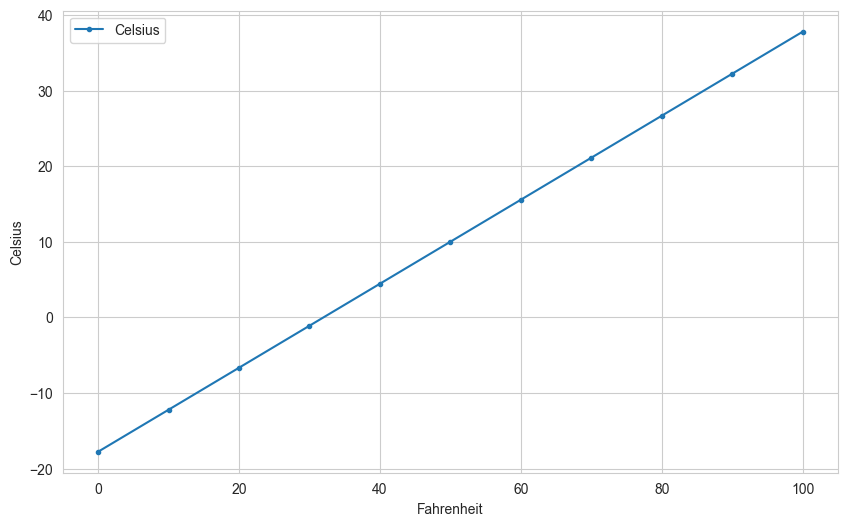

In [182]:
# Create a lambda function that converts Fahrenheit to Celsius
c = lambda f: 5 / 9 * (f - 32)

# Create a list of tuples containing Fahrenheit and Celsius temperatures
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Create a DataFrame from the temperatures
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

# Plotting
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-', figsize=(10, 6))

# Set the y-axis label
y_label = axes.set_ylabel('Celsius')

### Fahrenheit to Celsius Conversion

In this section, we define a lambda function to convert Fahrenheit to Celsius. We then create a list of tuples containing Fahrenheit temperatures (from 0 to 100 in increments of 10) and their corresponding Celsius values. This data is stored in a Pandas DataFrame, which we plot to visualize the conversion.



## Part 2 - Prediction

### Section 1 - Data Acquisition


In [183]:
# Load the data
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv') 

### Section 2 - Data Inspection

In [184]:
# View the first and last few rows of the DataFrame
print(nyc_df.head())
print(nyc_df.tail())


     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


### Section 3 - Data Cleaning

In [185]:
# Rename columns for clarity
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Inspect the change
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [186]:
# Check data type of date column
nyc_df.Date.dtype

# Truncate to remove last 2 digits
nyc_df.Date = nyc_df.Date.floordiv(100)

# Inspect change
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [187]:
pd.set_option('display.precision', 2)

# Calculate basic descriptive statistics
nyc_df.Temperature.describe()



count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model


In [188]:
from scipy import stats 

# Create linear regression function
linear_regression = stats.linregress(x=nyc_df.Date,y=nyc_df.Temperature)

# Calculates line's slope
linear_regression.slope




np.float64(0.014771361132966163)

In [189]:
# Calculates line's intercept
linear_regression.intercept


np.float64(8.694993233674289)

### Section 6: Predict

In [190]:
# What is the predicted temperature in 2024
linear_regression.slope * 2024 + linear_regression.intercept



np.float64(38.5922281667978)

### Section 7 - Visualizations

(10.0, 70.0)

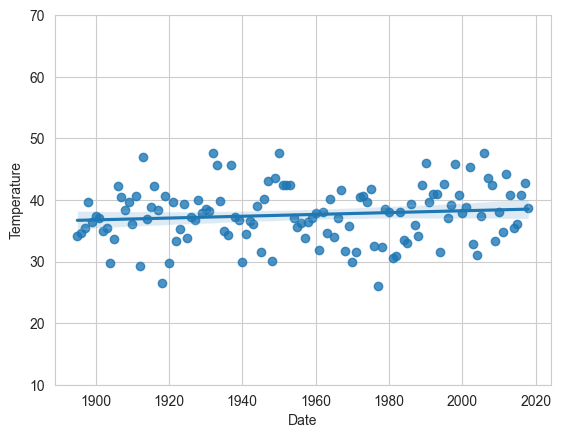

In [191]:
sns.set_style('whitegrid')

axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

# Limit Y axis
axes.set_ylim(10,70)